In [6]:
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Data_Sets/p4/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from IPython import display
from sklearn import preprocessing
import grafica as gr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Input
from sklearn import metrics
from keras.optimizers import SGD

## Ejercicio 8

Utilizando el archivo **Iris.csv** que contiene información referida a la longitud y al ancho de sépalos y pétalos de tres especies de flores: *iris setosa*, *iris versicolor* e *iris virginica*.  

### a)

Entrenar una multiperceptrón que aprenda a clasificar las 3 clases de flores.  


In [10]:
ALPHA = 0.1
LOSS = 'categorical_crossentropy'
EPOCHS = 100
BATCH = 5
#----------------------------------------------
data = pd.read_csv(DATOS_DIR + 'Iris.csv')
X = data.iloc[:,0:4].values
T = data.iloc[:,4].values
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)
binarizer = preprocessing.LabelBinarizer()
T_train = binarizer.fit_transform(T_train)
T_test = binarizer.transform(T_test)
#----------------------------------------------
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
#----------------------------------------------
I = Input(shape=(4,), name='entrada')
oculta = Dense(units=2, activation='tanh',name='Oculta')
salida = Dense(units=3, activation='softmax', name='salida')
red = salida(oculta(I))
model = Model(inputs=I, outputs = red)
model.summary()
model.compile(optimizer=SGD(learning_rate=ALPHA), loss=LOSS,metrics=['accuracy'])
#----------------------------------------------
model.fit(X_train, T_train, epochs=EPOCHS, batch_size=BATCH, verbose=0)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Oculta (Dense)                  │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (76.00 B)

 Trainable params: 19 (76.00 B)

 Non-trainable params: 0 (0.00 B)

### b)

Utilice Python para calcular la matriz de confusión y calcule de forma manual las métricas de **precision**, **recall**, **accuracy** y **f1-score**. Luego utilice la función **classification_report** de SciKit-Learn para comparar los resultados.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
% aciertos train: 0.983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
% aciertos test: 0.967


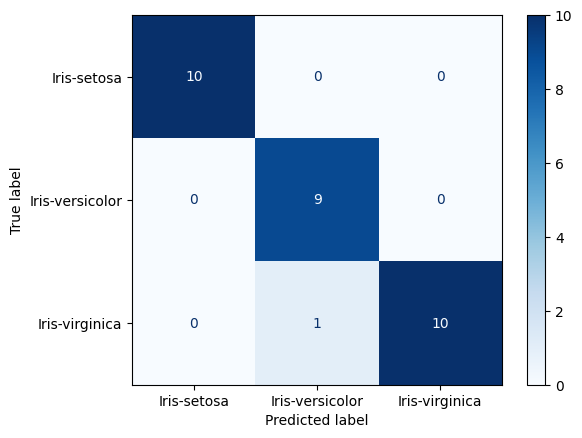

% aciertos (sklearn): 0.967
Recall por clase: [1.         1.         0.90909091]
Precision por clase: [1.  0.9 1. ]
F1-score por clase: [1.         0.94736842 0.95238095]
% aciertos (sin sklearn): 0.967
Recall por clase: [1.         1.         0.90909091]
Precision por clase: [1.  0.9 1. ]
F1-score por clase: [1.         0.94736842 0.95238095]


In [19]:
Y_train = model.predict(X_train)
T_str = binarizer.inverse_transform(T_train)
Y_str = binarizer.inverse_transform(Y_train)
print("%% aciertos train: %.3f" % metrics.accuracy_score(T_str, Y_str))

Y_test = model.predict(X_test)
T_str = binarizer.inverse_transform(T_test)
Y_str = binarizer.inverse_transform(Y_test)
print("%% aciertos test: %.3f" % metrics.accuracy_score(T_str, Y_str))
#---------------------------------------------- 
#Calcuamos la matriz de confusion
cm = metrics.confusion_matrix(T_str, Y_str)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=binarizer.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()
accuracy = metrics.accuracy_score(T_str, Y_str)
print("%% aciertos (sklearn): %.3f" % accuracy)
recall = metrics.recall_score(T_str, Y_str, average=None)
precision = metrics.precision_score(T_str, Y_str, average=None)
f1_score = metrics.f1_score(T_str, Y_str, average=None)
print("Recall por clase:", recall)
print("Precision por clase:", precision)
print("F1-score por clase:", f1_score)
#----------------------------------------------
#Calculamos sin usar sklearn
def confusion_matrix(T, Y):
    n = T.shape[0]
    num_classes = T.shape[1]
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(n):
        true_class = np.argmax(T[i])
        predicted_class = np.argmax(Y[i])
        cm[true_class, predicted_class] += 1
    return cm
accuracy = np.trace(cm) / np.sum(cm)
print("%% aciertos (sin sklearn): %.3f" % accuracy)
recall = np.diag(cm) / np.sum(cm, axis=1)
precision = np.diag(cm) / np.sum(cm, axis=0)
f1_score = 2 * (precision * recall) / (precision + recall)
print("Recall por clase:", recall)
print("Precision por clase:", precision)
print("F1-score por clase:", f1_score)